In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [9]:
#define the right hand side equations
#fill with the values given by the figure information
def rhs(t, g, count):
    #rate constants
    ksCtrAP1 = 0.0083
    ksCtrAP2 = 0.073
    kdCtrA1 = 0.002
    kdCtrA2 = 0.15
    ksGcrA = 0.045
    kdGcrA = 0.022
    ksDnaA = 0.0165
    kdDnaA = 0.007
    ksFts = 0.063
    kdFts = 0.035
    kzringOpen = 0.8
    kzringClosed1 = 0.0001
    kzringClosed2 = 0.6
    ksDivK = 0.0054
    kdDivK = 0.002
    kdDivKP = 0.002
    ktransDivK = 0.5
    ktransDivKP = 0.0295
    ksI = 0.08
    kdI = 0.04
    ksCcrM = 0.072
    kdCcrM = 0.07
    kmcori = 0.4
    kmctrA = 0.4
    kmccrM = 0.4
    kmfts = 0.4
    kaIni = 0.01
    kelong = 0.006
   
    
    
    #Binding constants
    JiCtrACtrA = 0.4
    JiDnaAGcrA = 0.5
    JZringFts = 0.78
    Jmfts = 0.95
    ThetaCori = 0.0002
    JaCtrACtrA = 0.45
    JaDnaACtrA = 0.3
    Jmcori = 0.95
    ThetaCtrA = 0.2
    JdCtrADivKP = 0.55
    Jaopen = 0.01
    JmctrA = 0.95
    ThetaGcrA = 0.45
    JiGcrACtrA = 0.2
    Jaclosed = 0.1
    JmccrM = 0.95
    ThetaDnaA = 0.6
    
    #Gene positions on the chromosome
    Pelong = 0.05
    PccrM = 0.2
    PctrA = 0.375
    Pfts = 0.625
    
    f = np.zeros(16)
    f[0]  = (ksCtrAP1 * JiCtrACtrA**2/(JiCtrACtrA**2 + g[0]**2)*g[4]  + ksCtrAP2*g[0]**2/(JaCtrACtrA**2 + g[0]**2))\
            *(g[6] - (kdCtrA1+kdCtrA2*g[9]**2/(JdCtrADivKP**2+g[9]**2))*g[0])
    f[1]  = kzringOpen * (1 - g[1])/(Jaopen+1-g[1]) - (kzringClosed1+kzringClosed2*(g[12]/JZringFts)**4)\
            *(g[1]/(Jaclosed+g[1]))
    f[2]  = ksCcrM * g[13] - kdCcrM*g[2]
    f[3]  = -kmcori *g[2]**4/(Jmcori**4+g[2]**4)*g[3] #if statement
    f[4]  = ksGcrA*JiGcrACtrA**2/(JiGcrACtrA**2+g[0]**2)*g[8]-kdGcrA*g[4]
    f[5]  = ksDivK*g[0] + ktransDivKP*g[9]-ktransDivK*g[5]*(1-g[1])-kdDivK*g[5]
    f[6]  = -kmctrA*g[2]**4/(JmctrA**4+g[2]**4)*g[6] #if statement
    f[7]  = kaIni*(g[8]/ThetaDnaA)**4 *(g[4]/ThetaGcrA)**4\
           /(1+(g[8]/ThetaDnaA)**4+(g[4]/ThetaGcrA)**4+(g[0]/ThetaCtrA)**4+ g[3]/ThetaCori) #if statement
    f[8]  = ksDnaA * (JiDnaAGcrA**2/(JiDnaAGcrA**2+g[4]**2)) *(g[0]**2/(JaDnaACtrA**2+g[0]**2))*(2-g[3])\
          -kdDnaA*g[8]
    f[9]  = -ktransDivKP*g[9] + ktransDivK*g[5]*(1-g[1])-kdDivKP*g[5]
    f[10] = -kmccrM*g[2]**4/(JmccrM**4+g[2]**4)*g[10] #if statement
    f[11] = kelong*(g[11])**4/(g[11]**4 + Pelong**4)*count #if statement define Count
    f[12] = ksFts*g[0]*g[14] - kdFts*g[12]
    f[13] = ksI*g[0]*g[10] - kdI*g[13]
    f[14] = -kmfts*g[2]**4/(Jmfts**4 + g[2]**4)*g[14] #if statement
    f[15] = kelong*g[11]**4/(g[11]**4+Pelong**4)*count
    
    return f

In [10]:
def doint():
    intvode = ode(rhs).set_integrator('dop853', rtol=1.0e-12, atol=1.0e-12)
    # Initial values at t=0 
    g0 = [0.11,1.0,0.5,1.0,0.78,0.66,0.0,0.0,0.6,0.34,0.0,0.05,0.29,0.11,0.0,1.05]
    t0 = 0.0
    count = 2
    intvode.set_initial_value(g0, t0).set_f_params(count)
    time =  16.0
    # Interval at which to save the integration data
    save_dt = 1.0e-3 
    tm   = [t0]
    g1  = [g0[0]]
    g2  = [g0[1]]
    g3  = [g0[2]]
    g4  = [g0[3]]
    g5  = [g0[4]]
    g6  = [g0[5]]
    g7  = [g0[6]]
    g8  = [g0[7]]
    g9  = [g0[8]]
    g10  = [g0[9]]
    g11  = [g0[10]]
    g12  = [g0[11]]
    g13  = [g0[12]]
    g14  = [g0[13]]
    g15  = [g0[14]]
    g16  = [g0[15]]
    
    next_dt = save_dt
    min_dt = 1.0e-3
    # ierr = 0 (no error), 
    # ierr = 1 (integration reached time_year)
    # ierr = -1 (other error)
    ierr = 0 
    while (intvode.successful()):
        intvode.integrate(intvode.t + next_dt)
        tm.append(intvode.t)
        g1.append(intvode.y[0])
        g2.append(intvode.y[1])
        g3.append(intvode.y[2])
        g4.append(intvode.y[3])
        g5.append(intvode.y[4])
        g6.append(intvode.y[5])
        g7.append(intvode.y[6])
        g8.append(intvode.y[7])
        g9.append(intvode.y[8])
        g10.append(intvode.y[9])
        g11.append(intvode.y[10])
        g12.append(intvode.y[11])
        g13.append(intvode.y[12])
        g14.append(intvode.y[13])
        g15.append(intvode.y[14])
        g16.append(intvode.y[15])
        
        if intvode.t > time:
            break
            
    tm = np.array(tm)
    g1 = np.array(g1)
    g2 = np.array(g2)
    g3 = np.array(g3)
    g4 = np.array(g4)
    g5 = np.array(g5)
    g6 = np.array(g6)
    g7 = np.array(g7)
    g8 = np.array(g8)
    g9 = np.array(g9)
    g10 = np.array(g10)
    g11 = np.array(g11)
    g12 = np.array(g12)
    g13 = np.array(g13)
    g14 = np.array(g14)
    g15 = np.array(g15)
    g16 = np.array(g16)
    
    
    if intvode.successful():
        ierr = 0
    else:
        ierr = -1
    return tm,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ierr

In [11]:
t,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,err = doint() #let's solve the system

In [12]:
print(err)

0


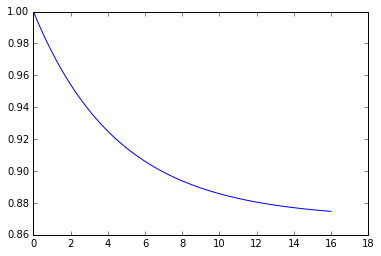

In [14]:
plt.plot(t, g4)